# Shoe Sandal Boot Classification

## Reference
- [Dataset Link](https://www.kaggle.com/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images)

## Outline
- Prepare Notebook
- Explore Dataset
- Load and Preprocess Dataset
- Config GPU
- CNN
    - Define Model
    - Model Training
    - Evaluation
    - Testing
- RESNET
    - Define Model
    - Model Training
    - Evaluation
    - Testing

## Motive
- To compare CNN and RESNET
- Get to know lifecyle of Deep Learning
- Get to know Neural Network architecture

### Prepare Notebook

First Let's import packages, we are going to use.

In [1]:
# Importing Necessary Packages
import os
import random
from PIL import Image

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torchvision.transforms as tt
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split, DataLoader

import warnings
warnings.filterwarnings('ignore')

### Explore Dataset

Before loading our dataset, Let's explore it, Because we get to know some information about the Images.

In [5]:
# First Exploring Parent Directory

PARENT_DIR = '/kaggle/input/shoe-vs-sandal-vs-boot-dataset-15k-images/Shoe vs Sandal vs Boot Dataset/'

print(f"Parent Directory Contains: {os.listdir(PARENT_DIR)}")

Parent Directory Contains: ['Shoe', 'Sandal', 'Boot']


In [6]:
# Second Exploring Sub-Folder's Lenght

for i in os.listdir(PARENT_DIR):
    print(f"{i} Folder's Length {len(os.listdir(PARENT_DIR + i))}")

Shoe Folder's Length 5000
Sandal Folder's Length 5000
Boot Folder's Length 5000


In [19]:
def plotRandomImage(subFolder):
    """Function Plot Random Image from give sub-folder"""
    path = PARENT_DIR + subFolder
    randInt = random.randrange(0, len(path))
    data = os.listdir(path)
    img = Image.open(path + '/' + data[randInt])
    print(f'Image Size: {img.size}')
    return img

Image Size: (136, 102)


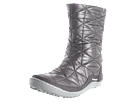

In [20]:
# Plotting Image from Boot

plotRandomImage('Boot')

Image Size: (136, 102)


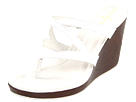

In [21]:
# Plotting Image from Sandal

plotRandomImage('Sandal')

Image Size: (136, 102)


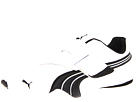

In [23]:
# Plotting Image from Shoe

plotRandomImage('Shoe')

*Key Insight*
- On Exploring
    - We get to know that parent directory contains three sub-folders ( Show, Sandal, Boots).
    - Each Sub Folder contains equal amount of images i.e 5000.
    - Every image is at same size i.e (136, 102).

- Methods
    - Resize every images to (100, 100).
    - Use Regularization Methods.
    - Convert to Tensor.

### Load and Preprocess Dataset

Now that we got some information about the dataset, let's apply some transformation and convert it to tensor

In [35]:
# Applying Regularization to Images

dataTransform = tt.Compose([
    tt.Resize(100),
    tt.RandomCrop(80),
    tt.RandomHorizontalFlip(),
    tt.ToTensor()
])

In [36]:
# Converting ImageFolder to Dataset

dataset = ImageFolder(PARENT_DIR, transform = dataTransform)

print(f"Classes of Dataset: {dataset.classes}")
print(f"Length of Dataset: {len(dataset)}")

Classes of Dataset: ['Boot', 'Sandal', 'Shoe']
Length of Dataset: 15000


Now that we applied some changes and it's converted from `PIL Image` to `Tensors`, Let's check the shape of the Image and Plot those images

In [37]:
# Checking Shape of Tensors

for i in [3, 33, 333, 3333]:
    img, label = dataset[i]
    print(f"Image Shape of {label}: {img.size()}")

Image Shape of 0: torch.Size([3, 80, 80])
Image Shape of 0: torch.Size([3, 80, 80])
Image Shape of 0: torch.Size([3, 80, 80])
Image Shape of 0: torch.Size([3, 80, 80])


In [44]:
import plotly.express as px

def plotTensor(num):
    """Function to Plot Tensors"""
    img, _ = dataset[num]
    return px.imshow(img.permute((1, 2, 0)))


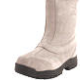

In [45]:
plotTensor(6)